In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [3]:
df = pd.read_csv("/gdrive/My Drive/18-19congress_time_0924.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'NAME', 'TALK', 'LENGTH', 'FILENAME', 'INDEX_IN_MEETING',
       'WHEN', 'WHERE', 'INDEX', 'filepath_resi_front', 'ROUND1', 'ROUND2',
       'ROUND3', 'COMMITTEE', 'filepath_resi_back'],
      dtype='object')

In [13]:
import re
test = []
for x in df.WHEN.unique():
    test.append(re.compile('[^0-9]').sub(" ", x))

In [34]:
len(test)

1072

In [39]:
pd.DataFrame(test).value_counts()

                 10
                 10
                  4
                  2
2012 2 14         2
                 ..
2013 4 22         1
2013 4 2          1
2013 4 19         1
2013 4 18         1
                  1
Length: 1048, dtype: int64

In [16]:
TF = []
for y in test:
    TF.append(re.search("^[ ]+", y))

In [33]:
len(TF)

1072

In [40]:
pd.DataFrame(TF)

,0
0,None
1,None
2,None
3,None
4,None
...,...
1067,None
1068,None
1069,None
1070,None


In [7]:
df[df["WHEN"] == "농림수산식품위원회회의실"]

,Unnamed: 0,NAME,TALK,LENGTH,FILENAME,INDEX_IN_MEETING,WHEN,WHERE,INDEX,filepath_resi_front,ROUND1,ROUND2,ROUND3,COMMITTEE,filepath_resi_back
767339,0,309 1,2012년7월11일(수) 농림수산식품위원회회의실 (15시59분 개의),4,/content/drive/My Drive/all/국회회의록_19대_...,0,농림수산식품위원회회의실,(15시59분,767339,/content/drive/My Drive/all/국회회의록,19대,309회,1차,농림수산식품위원회.txt,NaN
767340,1,위원장 최규성,의석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제309회 국회(임시회) 제1차 ...,15,/content/drive/My Drive/all/국회회의록_19대_...,1,농림수산식품위원회회의실,(15시59분,767340,/content/drive/My Drive/all/국회회의록,19대,309회,1차,농림수산식품위원회.txt,NaN
767341,2,입법조사관 장지원,보고사항을 말씀드리겠습니다. (보고사항은 끝에 실음),5,/content/drive/My Drive/all/국회회의록_19대_...,2,농림수산식품위원회회의실,(15시59분,767341,/content/drive/My Drive/all/국회회의록,19대,309회,1차,농림수산식품위원회.txt,NaN
767342,3,위원장 최규성,의사일정에 들어가기에 앞서 신임 위원장으로서 간단히 인사말씀을 드리겠습니다. 평소 ...,346,/content/drive/My Drive/all/국회회의록_19대_...,3,농림수산식품위원회회의실,(15시59분,767342,/content/drive/My Drive/all/국회회의록,19대,309회,1차,농림수산식품위원회.txt,NaN
767343,4,김재원 위원,안녕하십니까? 17대 국회에서 농림해양수산위원회에서 한 3년가량 일했던 김재원 위원...,30,/content/drive/My Drive/all/국회회의록_19대_...,4,농림수산식품위원회회의실,(15시59분,767343,/content/drive/My Drive/all/국회회의록,19대,309회,1차,농림수산식품위원회.txt,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932476,233,김선동 위원,고맙습니다.,1,/content/drive/My Drive/all/국회회의록_19대_...,233,농림수산식품위원회회의실,(10시17분,932476,/content/drive/My Drive/all/국회회의록,19대,311회,3차,농림수산식품위원회.txt,NaN
932477,234,위원장 최규성,수고하셨고요. 박민수 위원님 말씀하셨던 부분은 위원장으로서 농협한테 성실하게 자료를...,42,/content/drive/My Drive/all/국회회의록_19대_...,234,농림수산식품위원회회의실,(10시17분,932477,/content/drive/My Drive/all/국회회의록,19대,311회,3차,농림수산식품위원회.txt,NaN
940729,0,311 8,2012년10월15일(월) 농림수산식품위원회회의실 (14시13분 개의),4,/content/drive/My Drive/all/국회회의록_19대_...,0,농림수산식품위원회회의실,(14시13분,940729,/content/drive/My Drive/all/국회회의록,19대,311회,8차,농림수산식품위원회.txt,NaN
940730,1,위원장 최규성,좌석을 정돈해 주시기 바랍니다. 국정감사를 계속하기 전에 증인 관련 사항을 먼저 처...,26,/content/drive/My Drive/all/국회회의록_19대_...,1,농림수산식품위원회회의실,(14시13분,940730,/content/drive/My Drive/all/국회회의록,19대,311회,8차,농림수산식품위원회.txt,NaN


In [ ]:
df['TALK'][1]

'좌석을 정돈해 주시기 바랍니다. 성원이 되었으므로 제311회 국회(정기회) 제11차 지식경제위원회를 개의하겠습니다. 1. 2012년도 전력산업기반기금운용계획 변경안'

In [ ]:
df['TALK'][1].find("FTA")

-1

In [ ]:
def FTAfinder(talk):
    found = []
    for x in talk:
        found.append(str(x).find("FTA"))
    return found

In [ ]:
def FTAfinderB(talk):
    found = []
    for x in talk:
        found.append(str(x).find("자유 무역 협정"))
    return found

In [ ]:
def FTAfinderC(talk):
    found = []
    for x in talk:
        found.append(str(x).find("자유무역협정"))
    return found

In [ ]:
df["FTAlabel"] = FTAfinder(df['TALK'])

In [ ]:
df["FTAlabelB"] = FTAfinderB(df['TALK'])

In [ ]:
df["FTAlabelC"] = FTAfinderC(df['TALK'])

In [ ]:
sum(df["FTAlabel"] != -1)

8444

In [ ]:
sum(df["FTAlabelB"] != -1)

0

In [ ]:
sum(df["FTAlabelC"] != -1)

563

In [ ]:
a = np.array(FTAfinder(df['TALK'])!=-1, dtype=bool)
b = np.array(FTAfinderC(df['TALK'])!=-1, dtype=bool)

In [ ]:
df["IsFTA"] = np.logical_or(a, b)

In [ ]:
df.to_csv("/gdrive/My Drive/BigCongressLogFTA.csv")

In [ ]:
df_fta=df[df["FTAlabel"] != -1]

In [ ]:
df_fta.to_csv("/gdrive/My Drive/CongressLogFTA.csv")

In [ ]:
df_fta

,Unnamed: 0,NAME,TALK,LENGTH,FILENAME,INDEX_IN_MEETING,WHEN,WHERE,INDEX,filepath_resi_front,ROUND1,ROUND2,ROUND3,COMMITTEE,filepath_resi_back,FTAlabel,FTAlabelB,FTAlabelC,IsFTA
698,497,조원진 위원,여기에 계시는 각 부서가 다 같습니다. 산하기관들이 그 부분에 대해서 자체적으로 준...,408,/content/drive/My Drive/all/국회회의록_19대_...,497,2012년11월5일(월),정무위원회회의실,698,/content/drive/My Drive/all/국회회의록,19대,311회,11차,정무위원회.txt,NaN,622,-1,-1,True
1915,3,농림수산식품부장관 서규용,"존경하는 최규성 위원장님, 그리고 농림수산식품위원회 위원님 여 2 제311회-농림수...",287,/content/drive/My Drive/all/국회회의록_19대_...,3,2012년11월2일(금),농림수산식품위원회회의실,1915,/content/drive/My Drive/all/국회회의록,19대,311회,11차,농림수산식품위원회.txt,NaN,230,-1,981,True
1917,5,농림수산식품부기획조정실장 이양호,기획조정실장입니다. 보고는 배포해 드린 유인물을 중심으로 간략히 설명을 드리겠습니다...,766,/content/drive/My Drive/all/국회회의록_19대_...,5,2012년11월2일(금),농림수산식품위원회회의실,1917,/content/drive/My Drive/all/국회회의록,19대,311회,11차,농림수산식품위원회.txt,NaN,210,-1,-1,True
1919,7,농촌진흥청장 박현출,"존경하는 최규성 위원장님, 그리고 농림수산식품위원회 위원님 여러분! 평소 농업.농촌...",803,/content/drive/My Drive/all/국회회의록_19대_...,7,2012년11월2일(금),농림수산식품위원회회의실,1919,/content/drive/My Drive/all/국회회의록,19대,311회,11차,농림수산식품위원회.txt,NaN,497,-1,-1,True
1923,11,수석전문위원 지성배,검토보고드리겠습니다. 먼저 2013년도 예산안 및 기금운용계획안 규모입니다. 201...,404,/content/drive/My Drive/all/국회회의록_19대_...,11,2012년11월2일(금),농림수산식품위원회회의실,1923,/content/drive/My Drive/all/국회회의록,19대,311회,11차,농림수산식품위원회.txt,NaN,329,-1,-1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476030,181,기획재정부장관 윤증현,"존경하는 서병수 위원장님, 그리고 기획재정위원회 위원님 여러분! 제289회 임시국회...",462,/content/drive/My Drive/all/국회회의록_18대_...,181,2010年4月13日(火),企劃財政委員會會議室,1476030,/content/drive/My Drive/all/국회회의록,18대,289회,3차,기획재정위원회.txt,NaN,1629,-1,-1,True
1476034,185,관세청장 윤영선,지난 3월 23일자로 관세청장으로 부임한 윤영선입니다. 존경하는 서병수 위원장님과 ...,63,/content/drive/My Drive/all/국회회의록_18대_...,185,2010年4月13日(火),企劃財政委員會會議室,1476034,/content/drive/My Drive/all/국회회의록,18대,289회,3차,기획재정위원회.txt,NaN,125,-1,156,True
1476135,286,관세청장 윤영선,위원님 아시다시피 하반기에 한.EU FTA가 체결되면 44개국과 FTA가 발효되게 ...,29,/content/drive/My Drive/all/국회회의록_18대_...,286,2010年4月13日(火),企劃財政委員會會議室,1476135,/content/drive/My Drive/all/국회회의록,18대,289회,3차,기획재정위원회.txt,NaN,20,-1,-1,True
1476160,311,기획재정부장관 윤증현,지금 여기에 그 타이틀만 달았습니다마는 지금 FTA를 포함해서 양자 간에 또는 합동...,73,/content/drive/My Drive/all/국회회의록_18대_...,311,2010年4月13日(火),企劃財政委員會會議室,1476160,/content/drive/My Drive/all/국회회의록,18대,289회,3차,기획재정위원회.txt,NaN,25,-1,-1,True


In [ ]:
df_fta = pd.read_csv("/gdrive/My Drive/CongressLogFTA.csv")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_

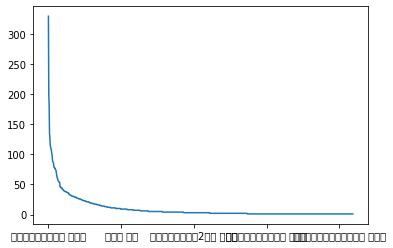

In [ ]:
df_fta.NAME.value_counts().plot()